In [10]:
    # Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [2]:
# Load dataset (make sure 'Housing.csv' is in the same folder)
df = pd.read_csv('Housing.csv')

# Check shape and preview
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Drop ID, date columns - not useful for modeling
df = df.drop(['id', 'date'], axis=1)

print("\nUpdated Columns:", df.columns.tolist())



Missing values in each column:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Updated Columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


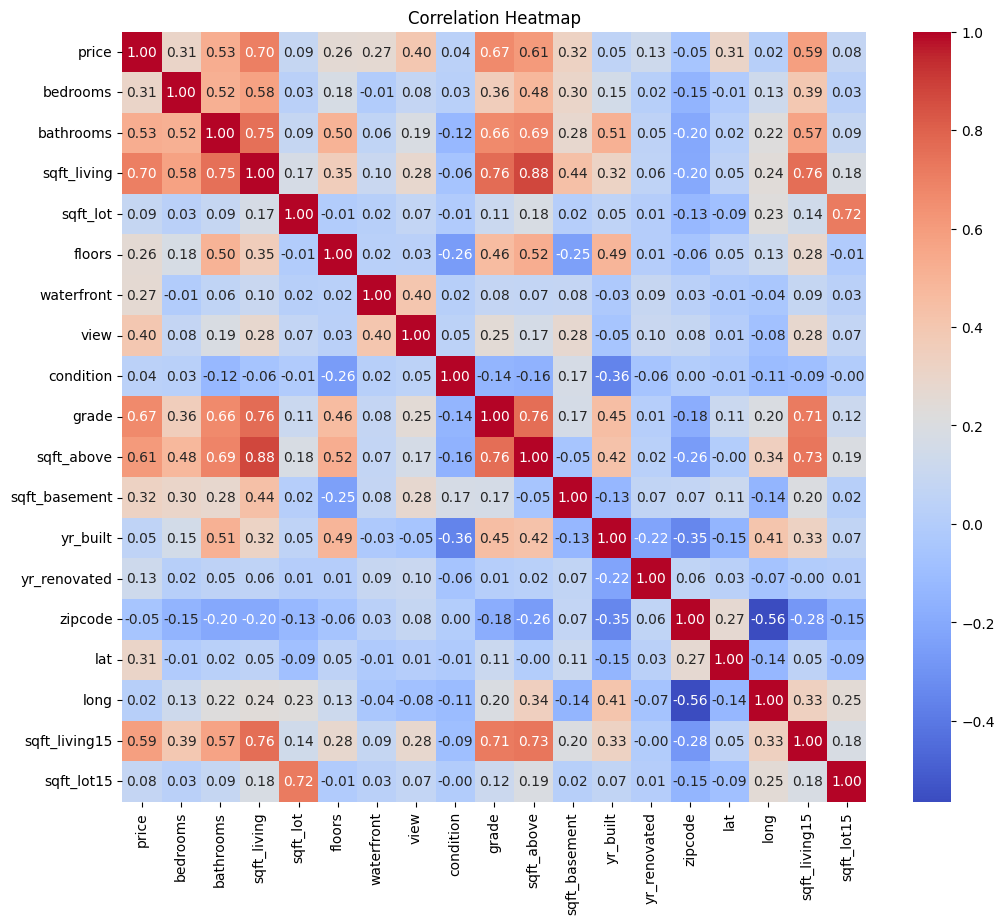

In [4]:
# Correlation matrix (numeric variables only)
plt.figure(figsize=(12,10))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Selecting relevant features based on correlation and domain knowledge
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15']

X = df[features]
y = df['price']

print("Selected Features:\n", features)


Selected Features:
 ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [6]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (17290, 17)
Testing Set Shape: (4323, 17)


In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [8]:
# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)

# Decision Tree Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print("MSE:", mse_dt)
print("R-squared:", r2_dt)


Linear Regression Performance:
MSE: 45211748904.88253
R-squared: 0.7009344347423989

Decision Tree Performance:
MSE: 49409490907.52171
R-squared: 0.6731673141325326


In [9]:
print("\nConclusion:")
if r2_lr > r2_dt:
    print("Linear Regression performed better.")
else:
    print("Decision Tree performed better.")



Conclusion:
Linear Regression performed better.
